<a href="https://colab.research.google.com/github/jayesh2409/Deep-Learning/blob/main/Feed%20forward%20NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn numpy tensorflow matplotlib

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#load minst data

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))

#reshape changes each image from a 2D matrix (28×28) to a 1D vector (784 values), so it can be fed into a fully connected neural network.


X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

#Dividing by 255.0 normalizes the values to a range of 0 to 1, which helps the model train faster and more accurately.

In [8]:
lb = LabelBinarizer() #Creates a LabelBinarizer object from sklearn, which converts class labels (like 0–9) into a one-hot encoded format.

Y_train = lb.fit_transform(Y_train) #Fits the binarizer to the training labels (learns there are 10 classes: 0–9).Then transforms them into one-hot vectors.
#Example:
#Label 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

Y_test = lb.transform(Y_test) #Applies the same transformation to test labels using what was learned from training data.

In [9]:
#building the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
sgd = SGD(0.01) #(Stochastic Gradient Descent).0.01 is the learning rate — how big a step the model takes when updating weights.
#Smaller = slower but stable learning; larger = faster but riskier.

epochs=100

model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)
#loss → “categorical_crossentropy” is used for multi-class problems (like digits 0–9).
#optimizer → tells the model to use the SGD optimizer to update weights.
#metrics → tells Keras to track “accuracy” while training.

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8535 - loss: 0.5808 - val_accuracy: 0.8599 - val_loss: 0.5525
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8520 - loss: 0.5680 - val_accuracy: 0.8640 - val_loss: 0.5334
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8564 - loss: 0.5492 - val_accuracy: 0.8676 - val_loss: 0.5165
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8636 - loss: 0.5280 - val_accuracy: 0.8697 - val_loss: 0.5012
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8660 - loss: 0.5113 - val_accuracy: 0.8731 - val_loss: 0.4869
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8659 - loss: 0.5041 - val_accuracy: 0.8749 - val_loss: 0.4741
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8734 - loss: 0.4859 - val_accuracy: 0.8788 - val_loss: 0.4627
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8739 - loss: 0.4773 - val_accu

In [13]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.92      0.92      1032
           3       0.91      0.92      0.92      1010
           4       0.93      0.94      0.93       982
           5       0.92      0.88      0.90       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.91      0.91      0.91       974
           9       0.92      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



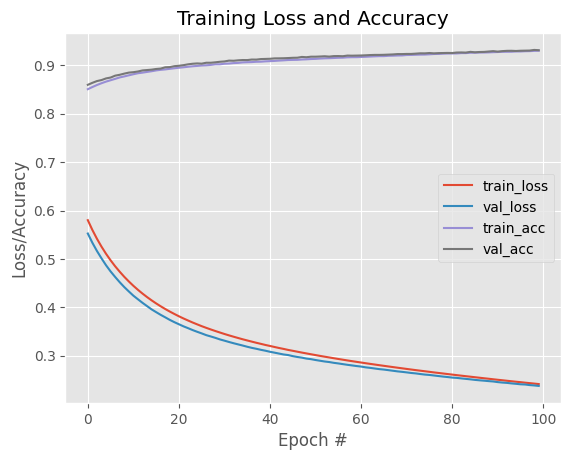

In [14]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()